In [1]:
#   Licensed under the Apache License, Version 2.0 (the "License");
#   you may not use this file except in compliance with the License.
#   You may obtain a copy of the License at
#
#       http://www.apache.org/licenses/LICENSE-2.0
#
#   Unless required by applicable law or agreed to in writing, software
#   distributed under the License is distributed on an "AS IS" BASIS,
#   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#   See the License for the specific language governing permissions and
#   limitations under the License.

###################################################
#   William M. Kirby, 2021
#   Theory references: https://arxiv.org/abs/1904.02260, https://arxiv.org/abs/2002.05693, and https://arxiv.org/abs/2011.10027.
###################################################

# How to use cs_vqe.py...

In order to import cs_vqe as a module, you may need to add it to `sys.path` via
> `import sys`  
> `sys.path.insert(1, 'replace/with/path/to/ContextualSubspaceVQE')`

In [1]:
import numpy as np
import cs_vqe as c

Let's use as our example the following 8-qubit Hamiltonian, expressed as a dict mapping Pauli terms to their coefficients.
Note that Pauli terms are expressed as strings composed of `'I'`, `'X'`, `'Y'`, and `'Z'`, which respectively denote single-qubit identity, $\sigma_x$, $\sigma_y$, and $\sigma_z$.

In [2]:
ham = {'IIIIIIII': -5.001425458221718, 'IIIIIIIX': -0.0005602367691690761, 'IIIIIIIZ': 1.0104418175624195, 'IIIIIIXI': 0.01115672755331298, 'IIIIIIXZ': 0.0002823107691970577, 'IIIIIIYY': -0.0018494520120760328, 'IIIIIIZI': 1.0104418175624192, 'IIIIIIZZ': 0.41455546243330654, 'IIIIIXIX': -0.02906042590649248, 'IIIIIXXI': 9.308532583860961e-05, 'IIIIIXYY': -0.0020610093726644778, 'IIIIIXZX': -0.015075372035589736, 'IIIIIXZZ': -0.03495312426599749, 'IIIIIYIY': -0.02906042590649248, 'IIIIIYYX': 0.0020610093726644778, 'IIIIIYZY': -0.015075372035589736, 'IIIIIZII': -0.11536854093063532, 'IIIIIZIZ': 0.0908717615562679, 'IIIIIZXZ': -0.0015283726900879773, 'IIIIIZZI': 0.09450446372057475, 'IIIIXIXI': 0.001783048244458605, 'IIIIXIZZ': -0.03290395741989794, 'IIIIXXIX': 0.001407793599187085, 'IIIIXXYY': -0.0036327021643068054, 'IIIIXYIY': 0.001407793599187085, 'IIIIXYYX': 0.0036327021643068054, 'IIIIXZIZ': 0.005477331994841993, 'IIIIXZXI': -0.015075372035589731, 'IIIIXZXZ': -0.02906042590649248, 'IIIIXZZI': 0.007538341367506473, 'IIIIXZZZ': 0.006252994193872944, 'IIIIYIYI': 0.001783048244458605, 'IIIIYXXY': 0.0036327021643068054, 'IIIIYYII': -0.030761705333347874, 'IIIIYYXX': -0.0036327021643068054, 'IIIIYZYI': -0.015075372035589731, 'IIIIYZYZ': -0.02906042590649248, 'IIIIYZZY': 9.308532583860961e-05, 'IIIIZIII': -0.11536854093063532, 'IIIIZIIZ': 0.09450446372057475, 'IIIIZIXZ': -0.002936166289275064, 'IIIIZIZI': 0.0908717615562679, 'IIIIZXZX': 0.0017830482444586048, 'IIIIZYZY': 0.0017830482444586048, 'IIIIZZII': 0.12338082226742374, 'IIIXIIII': 0.009009667437306818, 'IIIXIXII': 0.011777126885190555, 'IIIXIZZX': -0.004237537587205241, 'IIIXXIII': 0.007785194491376199, 'IIIXXIXX': -0.002876078434933135, 'IIIXXYYI': -0.0009055645739293965, 'IIIXYIIY': 0.00014546236418240159, 'IIIXYIYX': -0.002876078434933135, 'IIIXYYXI': 0.0009055645739293965, 'IIIXYYZZ': -0.008401378470806105, 'IIIXZIZX': -0.0033319730132758425, 'IIIXZXII': -0.007722138887627405, 'IIIXZXIZ': -3.4257263552726085e-05, 'IIIXZXXZ': -0.0003236922436263174, 'IIIXZXZI': -0.0029103356984858603, 'IIIXZZIX': -0.03443680350741975, 'IIIXZZXI': 0.001050560600682628, 'IIIXZZYY': -0.0003501492223109143, 'IIIXZZZX': -0.025703421671713647, 'IIIXZZZZ': 0.010904255360997208, 'IIIYIYII': 0.011777126885190555, 'IIIYIZZY': -0.004237537587205241, 'IIIYXIXY': -0.002876078434933135, 'IIIYXXYI': 0.0009055645739293965, 'IIIYYIIX': -0.00014546236418240159, 'IIIYYIYY': -0.002876078434933135, 'IIIYYXXI': -0.0009055645739293965, 'IIIYYXZZ': 0.008401378470806105, 'IIIYZIZY': -0.0033319730132758425, 'IIIYZYII': -0.007722138887627405, 'IIIYZYIZ': -3.4257263552726085e-05, 'IIIYZYXZ': -0.0003236922436263174, 'IIIYZYZI': -0.0029103356984858603, 'IIIYZZIY': -0.03443680350741975, 'IIIYZZYX': 0.0003501492223109143, 'IIIYZZZY': -0.025703421671713647, 'IIIZIIII': -0.19741969863049835, 'IIIZIIIZ': 0.09360099466745045, 'IIIZIIXZ': 0.00242624352162051, 'IIIZIIZI': 0.09898377244525777, 'IIIZIXZX': -0.002956741912550393, 'IIIZIYZY': -0.002956741912550393, 'IIIZIZII': 0.053512399991895616, 'IIIZXZXI': -0.002899815560653565, 'IIIZXZZZ': 0.002455848829893685, 'IIIZYZYI': -0.002899815560653565, 'IIIZZIII': 0.056570323857124016, 'IIIZZXII': -0.002455848829893685, 'IIIZZZZX': -0.00242624352162051, 'IIXIIIII': -0.010904255360997208, 'IIXIIIXX': -0.0003501492223109143, 'IIXIIYYI': 0.00014546236418240159, 'IIXIXIII': -0.0015766376238054121, 'IIXIXXII': -0.008401378470806105, 'IIXIXZZX': -0.0003236922436263174, 'IIXIZZXI': 0.0004952892952564533, 'IIXIZZZZ': -0.009009667437306818, 'IIXXIIIX': 0.0011230560926772924, 'IIXXIIYY': -0.005382777777807297, 'IIXXIXXI': 5.692635189682806e-05, 'IIXXIXZZ': -0.002135874095436016, 'IIXXYYII': -0.0030579238652283926, 'IIXXYZZY': 5.692635189682806e-05, 'IIXYIIIY': 0.0011230560926772924, 'IIXYIIYX': 0.005382777777807297, 'IIXYIYXI': 5.692635189682806e-05, 'IIXYIYZZ': -0.002135874095436016, 'IIXYYIII': 0.002135874095436016, 'IIXYYXII': 0.0030579238652283926, 'IIXYYZZX': -5.692635189682806e-05, 'IIXYZZYI': -0.0011230560926772924, 'IIXZIZXI': -0.0033319730132758425, 'IIXZIZZZ': 0.00434212837164487, 'IIXZXIII': -0.0077221388876273925, 'IIXZXIIZ': -0.0029103356984858603, 'IIXZXIXZ': -0.0013717943100752413, 'IIXZXIZI': -3.4257263552726085e-05, 'IIXZXXZX': 0.0009055645739293965, 'IIXZXYZY': 0.0009055645739293965, 'IIXZXZII': 0.011777126885190555, 'IIXZYIYZ': -0.0009026397022665242, 'IIXZZIXI': -0.004237537587205241, 'IIXZZIZZ': 0.012743506842450984, 'IIXZZXIX': -0.001048102066448925, 'IIXZZXYY': -0.002876078434933135, 'IIXZZYIY': -0.001048102066448925, 'IIXZZYYX': 0.002876078434933135, 'IIXZZZIZ': -0.004704676047649981, 'IIXZZZXI': -0.025703421671713637, 'IIXZZZXZ': -0.03443680350741975, 'IIXZZZZI': -0.004354526825339065, 'IIXZZZZZ': 0.014552460686322212, 'IIYIIIIY': 0.001050560600682628, 'IIYIIIYX': -0.0003501492223109143, 'IIYIIYXI': -0.00014546236418240159, 'IIYIIYZZ': 0.007785194491376198, 'IIYIYIII': -0.0015766376238054121, 'IIYIYXII': -0.008401378470806105, 'IIYIYZZX': -0.0003236922436263174, 'IIYIZZYI': 0.0004952892952564533, 'IIYXIIXY': 0.005382777777807297, 'IIYXIXYI': 5.692635189682806e-05, 'IIYXXYII': 0.0030579238652283926, 'IIYXXZZY': -5.692635189682806e-05, 'IIYYIIII': -0.006577661355747096, 'IIYYIIXX': -0.005382777777807297, 'IIYYIYYI': 5.692635189682806e-05, 'IIYYXIII': -0.002135874095436016, 'IIYYXXII': -0.0030579238652283926, 'IIYYXZZX': 5.692635189682806e-05, 'IIYYZZXI': 0.0011230560926772924, 'IIYYZZZZ': -0.006577661355747096, 'IIYZIZYI': -0.0033319730132758425, 'IIYZYIII': -0.0077221388876273925, 'IIYZYIIZ': -0.0029103356984858603, 'IIYZYIXZ': -0.0004691546078087188, 'IIYZYIZI': -3.4257263552726085e-05, 'IIYZYXZX': 0.0009055645739293965, 'IIYZYYZY': 0.0009055645739293965, 'IIYZYZII': 0.011777126885190555, 'IIYZZIYI': -0.004237537587205241, 'IIYZZXXY': 0.002876078434933135, 'IIYZZYII': 0.007785194491376198, 'IIYZZYXX': -0.002876078434933135, 'IIYZZZYI': -0.025703421671713637, 'IIYZZZYZ': -0.03443680350741975, 'IIYZZZZY': 0.001050560600682628, 'IIZIIIII': -0.1974196986304983, 'IIZIIIIZ': 0.09898377244525777, 'IIZIIIXZ': 0.001303187428943218, 'IIZIIIZI': 0.09360099466745045, 'IIZIIXZX': -0.002899815560653565, 'IIZIIYZY': -0.002899815560653565, 'IIZIIZII': 0.056570323857124016, 'IIZIXZXI': -0.002956741912550393, 'IIZIXZZZ': 0.0045917229253296995, 'IIZIYZYI': -0.002956741912550393, 'IIZIZIII': 0.053512399991895616, 'IIZIZXII': -0.0045917229253296995, 'IIZIZZZX': -0.001303187428943218, 'IIZXIIII': -0.014552460686322212, 'IIZXIIIZ': 0.004704676047649981, 'IIZXIIXZ': 0.001050560600682628, 'IIZXIIZI': 0.004354526825339065, 'IIZXIXZX': -0.0013717943100752413, 'IIZXIYZY': -0.0009026397022665242, 'IIZXIZII': -0.00434212837164487, 'IIZXXZXI': -0.001048102066448925, 'IIZXXZZZ': 0.007785194491376199, 'IIZXYZYI': -0.001048102066448925, 'IIZXZIII': -0.012743506842450984, 'IIZXZXII': -0.0015766376238054121, 'IIZXZZZX': 0.0004952892952564533, 'IIZYIYZX': -0.0004691546078087188, 'IIZYZYII': -0.0015766376238054121, 'IIZYZZZY': 0.0004952892952564533, 'IIZZIIII': 0.08468170939963947, 'IIZZIXII': 0.03290395741989794, 'IIZZIZZX': 0.0015283726900879773, 'IIZZXIII': 0.03495312426599749, 'IIZZXIXX': -0.0020610093726644778, 'IIZZXYYI': -0.0014077935991870852, 'IIZZYIIY': 9.308532583860961e-05, 'IIZZYIYX': -0.0020610093726644778, 'IIZZYYXI': 0.0014077935991870852, 'IIZZYYZZ': -0.030761705333347874, 'IIZZZIZX': 0.002936166289275064, 'IIZZZXII': -0.006252994193872958, 'IIZZZXIZ': -0.005477331994841993, 'IIZZZXXZ': 9.308532583860961e-05, 'IIZZZXZI': -0.007538341367506473, 'IIZZZZIX': -0.011156727553312975, 'IIZZZZXI': 0.0005602367691690761, 'IIZZZZYY': -0.0018494520120760328, 'IIZZZZZX': -0.0002823107691970594, 'IIZZZZZZ': 0.11404443186403874, 'IXIIIIII': 0.004877026695939432, 'IXIIIIIX': -0.0015024523676698824, 'IXIIIIXX': 0.0024547625653344985, 'IXIIIIYY': -0.0024547625653344985, 'IXIIIXXI': 0.0018915758280655941, 'IXIIIXZZ': 0.004882949606014626, 'IXIIIYYI': -0.0018915758280655941, 'IXIIXXII': 0.00598108191541999, 'IXIIXZZX': -0.0018915758280655941, 'IXIIYYII': -0.00598108191541999, 'IXIIYZZY': 0.0018915758280655941, 'IXIXXIII': -0.0048038632604819175, 'IXIXZZXI': 0.0025611654019874314, 'IXIXZZZZ': 0.0034636381008790766, 'IXIYYIII': 0.0048038632604819175, 'IXIYZZYI': -0.0025611654019874314, 'IXXIIIII': -0.003463638100879079, 'IXXXIIII': 0.010327309992822217, 'IXXZZXII': 0.004803863260481915, 'IXXZZZZX': -0.0025611654019874314, 'IXYYIIII': -0.010327309992822217, 'IXYZZYII': -0.004803863260481915, 'IXYZZZZY': 0.0025611654019874314, 'IXZZXIII': -0.004882949606014626, 'IXZZZZXI': 0.0015024523676698824, 'IXZZZZZZ': 0.004877026695939432, 'IYIIIIIY': -0.0015024523676698824, 'IYIIIIXY': 0.0024547625653344985, 'IYIIIIYX': 0.0024547625653344985, 'IYIIIXYI': 0.0018915758280655941, 'IYIIIYXI': 0.0018915758280655941, 'IYIIIYZZ': 0.004882949606014626, 'IYIIXYII': 0.00598108191541999, 'IYIIXZZY': -0.0018915758280655941, 'IYIIYXII': 0.00598108191541999, 'IYIIYZZX': -0.0018915758280655941, 'IYIXYIII': -0.0048038632604819175, 'IYIXZZYI': 0.0025611654019874314, 'IYIYXIII': -0.0048038632604819175, 'IYIYZZXI': 0.0025611654019874314, 'IYIYZZZZ': 0.0034636381008790766, 'IYXYIIII': 0.010327309992822217, 'IYXZZYII': 0.004803863260481915, 'IYXZZZZY': -0.0025611654019874314, 'IYYIIIII': -0.003463638100879079, 'IYYXIIII': 0.010327309992822217, 'IYYZZXII': 0.004803863260481915, 'IYYZZZZX': -0.0025611654019874314, 'IYZZYIII': -0.004882949606014626, 'IYZZZZYI': 0.0015024523676698824, 'IZIIIIII': -0.4579624763565425, 'IZIIIIIZ': 0.19570005174416316, 'IZIIIIXZ': 0.0016203413844881676, 'IZIIIIZI': 0.19570005174416316, 'IZIIIXZX': -0.00417410539426637, 'IZIIIYZY': -0.00417410539426637, 'IZIIIZII': 0.1313183119904171, 'IZIIXZXI': -0.00417410539426637, 'IZIIXZZZ': 0.0008821359371306427, 'IZIIYZYI': -0.00417410539426637, 'IZIIZIII': 0.1313183119904171, 'IZIXZXII': 0.002385574658706054, 'IZIXZZZX': -0.0050332548281435945, 'IZIYZYII': 0.002385574658706054, 'IZIYZZZY': -0.0050332548281435945, 'IZIZIIII': 0.13077016464474733, 'IZIZIZIZ': 0.12971451752077234, 'IZXZIZIZ': 0.004210307119683613, 'IZXZXIII': 0.002385574658706054, 'IZXZZZXI': -0.0050332548281435945, 'IZXZZZZZ': -0.004210307119683613, 'IZYZYIII': 0.002385574658706054, 'IZYZZZYI': -0.0050332548281435945, 'IZZIIIII': 0.13077016464474733, 'IZZIXZIZ': -0.0008821359371306427, 'IZZIZIXZ': -0.0016203413844881676, 'IZZIZIZI': 0.12971451752077234, 'IZZIZIZX': 0.0016203413844881676, 'IZZIZXIZ': 0.0008821359371306427, 'IZZXIIII': 0.004210307119683613, 'IZZXIZIZ': -0.004210307119683613, 'IZZZZXII': -0.0008821359371306427, 'IZZZZZZX': -0.0016203413844881676, 'XIIIIIII': 0.004877026695939432, 'XIIIIIIX': -0.0015024523676698824, 'XIIIIIXX': 0.0024547625653344985, 'XIIIIIYY': -0.0024547625653344985, 'XIIIIXXI': 0.0018915758280655941, 'XIIIIXZZ': 0.004882949606014626, 'XIIIIYYI': -0.0018915758280655941, 'XIIIXXII': 0.00598108191541999, 'XIIIXZZX': -0.0018915758280655941, 'XIIIYYII': -0.00598108191541999, 'XIIIYZZY': 0.0018915758280655941, 'XIIXXIII': -0.0048038632604819175, 'XIIXZZXI': 0.0025611654019874314, 'XIIXZZZZ': 0.0034636381008790766, 'XIIYYIII': 0.0048038632604819175, 'XIIYZZYI': -0.0025611654019874314, 'XIXIIIII': -0.003463638100879079, 'XIXXIIII': 0.010327309992822217, 'XIXZZXII': 0.004803863260481915, 'XIXZZZZX': -0.0025611654019874314, 'XIYYIIII': -0.010327309992822217, 'XIYZZYII': -0.004803863260481915, 'XIYZZZZY': 0.0025611654019874314, 'XIZZXIII': -0.004882949606014626, 'XIZZZZXI': 0.0015024523676698824, 'XIZZZZZZ': 0.004877026695939432, 'XXIIIIII': 0.008434569756845523, 'XZIZIZIZ': -0.004877026695939432, 'XZXZIZIZ': 0.003463638100879079, 'XZZIXZIZ': 0.004882949606014626, 'XZZIZIXZ': -0.0015024523676698824, 'XZZIZIZI': -0.004877026695939432, 'XZZIZIZX': 0.0015024523676698824, 'XZZIZXIZ': -0.004882949606014626, 'XZZXIZIZ': -0.0034636381008790766, 'YIIIIIIY': -0.0015024523676698824, 'YIIIIIXY': 0.0024547625653344985, 'YIIIIIYX': 0.0024547625653344985, 'YIIIIXYI': 0.0018915758280655941, 'YIIIIYXI': 0.0018915758280655941, 'YIIIIYZZ': 0.004882949606014626, 'YIIIXYII': 0.00598108191541999, 'YIIIXZZY': -0.0018915758280655941, 'YIIIYXII': 0.00598108191541999, 'YIIIYZZX': -0.0018915758280655941, 'YIIXYIII': -0.0048038632604819175, 'YIIXZZYI': 0.0025611654019874314, 'YIIYXIII': -0.0048038632604819175, 'YIIYZZXI': 0.0025611654019874314, 'YIIYZZZZ': 0.0034636381008790766, 'YIXYIIII': 0.010327309992822217, 'YIXZZYII': 0.004803863260481915, 'YIXZZZZY': -0.0025611654019874314, 'YIYIIIII': -0.003463638100879079, 'YIYXIIII': 0.010327309992822217, 'YIYZZXII': 0.004803863260481915, 'YIYZZZZX': -0.0025611654019874314, 'YIZZYIII': -0.004882949606014626, 'YIZZZZYI': 0.0015024523676698824, 'YYIIIIII': 0.008434569756845523, 'YZYZIZIZ': 0.003463638100879079, 'YZZIYZIZ': 0.004882949606014626, 'YZZIZIYZ': -0.0015024523676698824, 'YZZIZIZY': 0.0015024523676698824, 'YZZIZYIZ': -0.004882949606014626, 'YZZYIZIZ': -0.0034636381008790766, 'ZIIIIIII': -0.4579624763565428, 'ZIIIIIIZ': 0.19570005174416316, 'ZIIIIIXZ': 0.0016203413844881676, 'ZIIIIIZI': 0.19570005174416316, 'ZIIIIXZX': -0.00417410539426637, 'ZIIIIYZY': -0.00417410539426637, 'ZIIIIZII': 0.1313183119904171, 'ZIIIXZXI': -0.00417410539426637, 'ZIIIXZZZ': 0.0008821359371306427, 'ZIIIYZYI': -0.00417410539426637, 'ZIIIZIII': 0.1313183119904171, 'ZIIXZXII': 0.002385574658706054, 'ZIIXZZZX': -0.0050332548281435945, 'ZIIYZYII': 0.002385574658706054, 'ZIIYZZZY': -0.0050332548281435945, 'ZIIZIIII': 0.13077016464474733, 'ZIIZIZIZ': 0.12971451752077234, 'ZIXZIZIZ': 0.004210307119683613, 'ZIXZXIII': 0.002385574658706054, 'ZIXZZZXI': -0.0050332548281435945, 'ZIXZZZZZ': -0.004210307119683613, 'ZIYZYIII': 0.002385574658706054, 'ZIYZZZYI': -0.0050332548281435945, 'ZIZIIIII': 0.13077016464474733, 'ZIZIXZIZ': -0.0008821359371306427, 'ZIZIZIXZ': -0.0016203413844881676, 'ZIZIZIZI': 0.12971451752077234, 'ZIZIZIZX': 0.0016203413844881676, 'ZIZIZXIZ': 0.0008821359371306427, 'ZIZXIIII': 0.004210307119683613, 'ZIZXIZIZ': -0.004210307119683613, 'ZIZZZXII': -0.0008821359371306427, 'ZIZZZZZX': -0.0016203413844881676, 'ZXIZIZIZ': -0.004877026695939432, 'ZXXZIZIZ': 0.003463638100879079, 'ZXZIXZIZ': 0.004882949606014626, 'ZXZIZIXZ': -0.0015024523676698824, 'ZXZIZIZI': -0.004877026695939432, 'ZXZIZIZX': 0.0015024523676698824, 'ZXZIZXIZ': -0.004882949606014626, 'ZXZXIZIZ': -0.0034636381008790766, 'ZYYZIZIZ': 0.003463638100879079, 'ZYZIYZIZ': 0.004882949606014626, 'ZYZIZIYZ': -0.0015024523676698824, 'ZYZIZIZY': 0.0015024523676698824, 'ZYZIZYIZ': -0.004882949606014626, 'ZYZYIZIZ': -0.0034636381008790766, 'ZZIIIIII': 0.2707726623751819, 'ZZIIIZIZ': 0.05391367939397465, 'ZZIIXZIZ': -0.0045917229253296995, 'ZZIIZIXZ': -0.001303187428943218, 'ZZIIZIZI': 0.05391367939397465, 'ZZIIZIZX': 0.00242624352162051, 'ZZIIZXIZ': 0.002455848829893685, 'ZZIXIZIZ': -0.009009667437306818, 'ZZIXXZIZ': -0.007785194491376199, 'ZZIXZIXZ': -0.001050560600682628, 'ZZIXZIZI': -0.010904255360997208, 'ZZIXZIZX': 0.0038911166426645587, 'ZZIXZXIZ': -0.0027874839498146504, 'ZZIYZIZY': 0.0038911166426645587, 'ZZIYZYIZ': -0.0027874839498146504, 'ZZIZIIIZ': 0.08349406473042321, 'ZZIZIXXZ': -9.308532583860961e-05, 'ZZIZIXZI': 0.03495312426599749, 'ZZIZIXZX': -0.0009548391315205742, 'ZZIZIYZY': -0.0009548391315205742, 'ZZIZIZII': 0.08857801254613343, 'ZZIZIZIX': 0.0005602367691690761, 'ZZIZIZIZ': -0.39690605678468144, 'ZZIZIZXI': -0.0005602367691690761, 'ZZIZIZYY': 0.0018494520120760328, 'ZZIZIZZZ': 0.09042746455820946, 'ZZIZXIXZ': 0.0010479244573591837, 'ZZIZXIZI': -0.03495312426599749, 'ZZIZYIYZ': 0.0010479244573591837, 'ZZIZYIZY': -9.308532583860961e-05, 'ZZIZYYIZ': 0.030761705333347874, 'ZZIZZZIZ': 0.11425577006377113, 'ZZXIIZIZ': 0.009009667437306818, 'ZZXIXZIZ': 0.010572678441190855, 'ZZXIZIXZ': -0.002840556041981928, 'ZZXIZIZI': 0.010904255360997208, 'ZZXXZIZX': -0.0011230560926772924, 'ZZXXZXIZ': 0.002135874095436016, 'ZZXYYZIZ': -0.002135874095436016, 'ZZXYZIYZ': 0.0011230560926772924, 'ZZXYZIZY': -0.0011230560926772924, 'ZZXYZYIZ': 0.002135874095436016, 'ZZXZIIIZ': -0.012743506842450984, 'ZZXZIXZX': 0.001048102066448925, 'ZZXZIYYZ': -0.00014546236418240159, 'ZZXZIYZY': 0.001048102066448925, 'ZZXZIZII': 0.004354526825339065, 'ZZXZIZIZ': -0.014552460686322212, 'ZZXZIZXI': 0.0038911166426645587, 'ZZXZIZXX': 0.0003501492223109143, 'ZZXZIZZZ': 0.004704676047649981, 'ZZXZXIXZ': -0.0013717943100752413, 'ZZXZXIZI': -0.0027874839498146504, 'ZZXZXIZX': 0.0003236922436263174, 'ZZXZXXIZ': 0.008401378470806105, 'ZZXZYIYZ': -0.0009026397022665242, 'ZZXZZZIZ': -0.00434212837164487, 'ZZYIYZIZ': 0.010572678441190855, 'ZZYIZIYZ': -0.002840556041981928, 'ZZYIZIZY': -0.001050560600682628, 'ZZYIZYIZ': -0.007785194491376198, 'ZZYYIZIZ': 0.006577661355747096, 'ZZYYXZIZ': 0.002135874095436016, 'ZZYYZIXZ': -0.0011230560926772924, 'ZZYYZIZI': 0.006577661355747096, 'ZZYZIYXZ': 0.00014546236418240159, 'ZZYZIYZI': -0.007785194491376198, 'ZZYZIZIY': -0.001050560600682628, 'ZZYZIZYI': 0.0038911166426645587, 'ZZYZIZYX': 0.0003501492223109143, 'ZZYZYIXZ': -0.0004691546078087188, 'ZZYZYIZI': -0.0027874839498146504, 'ZZYZYIZX': 0.0003236922436263174, 'ZZYZYXIZ': 0.008401378470806105, 'ZZZIIIXZ': 0.002936166289275064, 'ZZZIIIZI': 0.08349406473042321, 'ZZZIIIZX': -0.0015283726900879773, 'ZZZIIXIZ': -0.03290395741989794, 'ZZZIXIIZ': 0.03290395741989794, 'ZZZIXXZX': -0.001407793599187085, 'ZZZIXYYZ': 0.0014077935991870852, 'ZZZIXYZY': -0.001407793599187085, 'ZZZIXZII': -0.007538341367506473, 'ZZZIXZIZ': -0.006252994193872944, 'ZZZIXZXI': -0.0009548391315205742, 'ZZZIXZXX': 0.0020610093726644778, 'ZZZIXZZZ': -0.005477331994841993, 'ZZZIYYXZ': -0.0014077935991870852, 'ZZZIYYZI': 0.030761705333347874, 'ZZZIYZIY': -9.308532583860961e-05, 'ZZZIYZYI': -0.0009548391315205742, 'ZZZIYZYX': 0.0020610093726644778, 'ZZZIZIII': 0.08857801254613343, 'ZZZIZIIX': 0.011156727553312975, 'ZZZIZIXI': -0.01115672755331298, 'ZZZIZIXZ': -0.0002823107691970577, 'ZZZIZIYY': 0.0018494520120760328, 'ZZZIZIZI': -0.39690605678468144, 'ZZZIZIZX': 0.0002823107691970594, 'ZZZIZIZZ': 0.09042746455820946, 'ZZZIZXII': 0.005477331994841993, 'ZZZIZXIX': 0.0010479244573591837, 'ZZZIZXIZ': 0.006252994193872958, 'ZZZIZXXI': -9.308532583860961e-05, 'ZZZIZXYY': 0.0020610093726644778, 'ZZZIZXZZ': 0.007538341367506473, 'ZZZIZYIY': 0.0010479244573591837, 'ZZZIZYYX': -0.0020610093726644778, 'ZZZIZZXZ': 0.0015283726900879773, 'ZZZIZZZI': 0.11425577006377113, 'ZZZIZZZX': -0.002936166289275064, 'ZZZXIIIZ': 0.00434212837164487, 'ZZZXIXXZ': 0.0003236922436263174, 'ZZZXIXZI': 0.010572678441190855, 'ZZZXIXZX': -0.0013717943100752413, 'ZZZXIYZY': -0.0009026397022665242, 'ZZZXIZII': -0.004704676047649981, 'ZZZXIZIX': -0.002840556041981928, 'ZZZXIZIZ': 0.014552460686322212, 'ZZZXIZXI': -0.001050560600682628, 'ZZZXIZYY': 0.0003501492223109143, 'ZZZXIZZZ': -0.004354526825339065, 'ZZZXXIXZ': 0.001048102066448925, 'ZZZXXIZI': -0.007785194491376199, 'ZZZXYIYZ': 0.001048102066448925, 'ZZZXYIZY': -0.00014546236418240159, 'ZZZXYYIZ': 0.008401378470806105, 'ZZZXZZIZ': 0.012743506842450984, 'ZZZYIYXZ': 0.0003236922436263174, 'ZZZYIYZI': 0.010572678441190855, 'ZZZYIYZX': -0.0004691546078087188, 'ZZZYIZIY': -0.002840556041981928, 'ZZZYIZYX': -0.0003501492223109143, 'ZZZYYIZX': 0.00014546236418240159, 'ZZZYYXIZ': -0.008401378470806105, 'ZZZZIZIZ': 0.060491340749721755, 'ZZZZXZIZ': -0.002455848829893685, 'ZZZZZIXZ': -0.00242624352162051, 'ZZZZZIZI': 0.060491340749721755, 'ZZZZZIZX': 0.001303187428943218, 'ZZZZZXIZ': 0.0045917229253296995}

## Testing contextuality

To test whether this Hamiltonian is contextual, run the following function, which takes $O(N^3)$ time where $N$ is the number of terms in the Hamiltonian.
See <https://arxiv.org/abs/1904.02260> for the definition of contextuality.

In [3]:
c.contextualQ_ham(ham)

True

You should find that the Hamiltonian is contextual. If you just want to check whether a list S of Pauli terms expressed as strings is contextual, use `c.contextualQ(S)` instead.

To find a large noncontextual sub-Hamiltonian (i.e., supported on a subset of the terms), run the following cell.
The second argument is the number of seconds to continue the depth-first search for (note that the depth-first search only starts after the initial candidate sub-Hamiltonian is found, so the total runtime may be longer). The third, optional argument can be either `'weight'` or `'size'` (the default is `'weight'`), determining whether the largest noncontextual subset is chosen by total term weight (sum of magnitudes of coefficients) or number of terms.

In [4]:
print(c.greedy_dfs(ham, 10, criterion='weight'))

[[], ['IIIIIIII', 'IIIIIIIZ', 'IIIIIIZI', 'ZIIIIIII', 'IZIIIIII', 'IIIIIIZZ', 'ZZIZIZIZ', 'ZZZIZIZI', 'ZZIIIIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIIZ', 'IZIIIIZI', 'ZIIIIIIZ', 'ZIIIIIZI', 'IZIIIZII', 'IZIIZIII', 'ZIIIIZII', 'ZIIIZIII', 'IZIZIIII', 'IZZIIIII', 'ZIIZIIII', 'ZIZIIIII', 'IZIZIZIZ', 'IZZIZIZI', 'ZIIZIZIZ', 'ZIZIZIZI', 'IIIIZZII', 'IIIIIZII', 'IIIIZIII', 'ZZIZZZIZ', 'ZZZIZZZI', 'IIZZZZZZ', 'IIIZIIZI', 'IIZIIIIZ', 'IIIIIZZI', 'IIIIZIIZ', 'IIIZIIIZ', 'IIZIIIZI', 'IIIIIZIZ', 'IIIIZIZI', 'ZZIZIZZZ', 'ZZZIZIZZ', 'ZZIZIZII', 'ZZZIZIII', 'IIZZIIII', 'ZZIZIIIZ', 'ZZZIIIZI', 'ZZZZIZIZ', 'ZZZZZIZI', 'IIIZZIII', 'IIZIIZII', 'ZZIIIZIZ', 'ZZIIZIZI', 'IIIZIZII', 'IIZIZIII', 'IIIIIXZZ', 'ZZIZIXZI', 'IIZZIXII', 'ZZZIIXIZ', 'IIZZZXZI', 'ZZZIZXZZ', 'IIZZZXII', 'ZZZIZXIZ', 'IIZZZXIZ', 'ZZZIZXII', 'IIZIZXII', 'ZZZZZXIZ', 'IIIZZXII', 'ZZIIZXIZ', 'IZZIZXIZ', 'IZZZZXII', 'ZIZIZXIZ', 'ZIZZZXII']]


The output is a list of subsets of the terms in `ham`, each of which is noncontextual.
Every time the depth-first search identifies a new largest noncontextual subset, it is added to the end of the output list, so the final item in the list is the largest noncontextual subset found.

Assuming you ran the above code and only obtained one nontrivial subset, it should give the following noncontextual Hamiltonian:

In [5]:
terms_noncon = ['IIIIIIII', 'IIIIIIIZ', 'IIIIIIZI', 'ZIIIIIII', 'IZIIIIII', 'IIIIIIZZ', 'ZZIZIZIZ', 'ZZZIZIZI', 'ZZIIIIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIIZ', 'IZIIIIZI', 'ZIIIIIIZ', 'ZIIIIIZI', 'IZIIIZII', 'IZIIZIII', 'ZIIIIZII', 'ZIIIZIII', 'IZIZIIII', 'IZZIIIII', 'ZIIZIIII', 'ZIZIIIII', 'IZIZIZIZ', 'IZZIZIZI', 'ZIIZIZIZ', 'ZIZIZIZI', 'IIIIZZII', 'IIIIIZII', 'IIIIZIII', 'ZZIZZZIZ', 'ZZZIZZZI', 'IIZZZZZZ', 'IIIZIIZI', 'IIZIIIIZ', 'IIIIIZZI', 'IIIIZIIZ', 'IIIZIIIZ', 'IIZIIIZI', 'IIIIIZIZ', 'IIIIZIZI', 'ZZIZIZZZ', 'ZZZIZIZZ', 'ZZIZIZII', 'ZZZIZIII', 'IIZZIIII', 'ZZIZIIIZ', 'ZZZIIIZI', 'ZZZZIZIZ', 'ZZZZZIZI', 'IIIZZIII', 'IIZIIZII', 'ZZIIIZIZ', 'ZZIIZIZI', 'IIIZIZII', 'IIZIZIII', 'IIIIIXZZ', 'ZZIZIXZI', 'IIZZIXII', 'ZZZIIXIZ', 'IIZZZXZI', 'ZZZIZXZZ', 'IIZZZXII', 'ZZZIZXIZ', 'IIZZZXIZ', 'ZZZIZXII', 'IIZIZXII', 'ZZZZZXIZ', 'IIIZZXII', 'ZZIIZXIZ', 'IZZIZXIZ', 'IZZZZXII', 'ZIZIZXIZ', 'ZIZZZXII']

ham_noncon = {p:ham[p] for p in terms_noncon}

Let's make sure it's really noncontextual:

In [6]:
print(c.contextualQ(terms_noncon))
print(c.contextualQ_ham(ham_noncon))

False
False


## Noncontextual models

cs_vqe.py provides three functions for generating and handling noncontextual (quasi-quantized) models of noncontextual Hamiltonians (as described in <https://arxiv.org/abs/2002.05693>).
The first is `quasi_model(ham_noncon)`:

In [7]:
model = c.quasi_model(ham_noncon)
print('commuting generators:',model[0], '\n')
print('anticommuting generators:',model[1], '\n')
print('term reconstruction:',model[2], '\n')

commuting generators: ['ZIIIIIII', 'IZIIIIII', 'IIZIZIZI', 'IIIZIIII', 'IIIIZIZI', 'IIIIIIZI', 'IIIIIIIZ'] 

anticommuting generators: ['IIIIIXZZ', 'ZZIZIZIZ'] 

term reconstruction: {'IIIIIIII': [[], [], 1], 'IIIIIIIZ': [['IIIIIIIZ'], [], 1], 'IIIIIIZI': [['IIIIIIZI'], [], 1], 'ZIIIIIII': [['ZIIIIIII'], [], 1], 'IZIIIIII': [['IZIIIIII'], [], 1], 'IIIIIIZZ': [['IIIIIIZI', 'IIIIIIIZ'], [], 1], 'ZZIZIZIZ': [[], ['ZZIZIZIZ'], 1], 'ZZZIZIZI': [['ZIIIIIII', 'IZIIIIII', 'IIZIZIZI'], [], 1], 'ZZIIIIII': [['ZIIIIIII', 'IZIIIIII'], [], 1], 'IIIZIIII': [['IIIZIIII'], [], 1], 'IIZIIIII': [['IIZIZIZI', 'IIIIZIZI'], [], 1], 'IZIIIIIZ': [['IZIIIIII', 'IIIIIIIZ'], [], 1], 'IZIIIIZI': [['IZIIIIII', 'IIIIIIZI'], [], 1], 'ZIIIIIIZ': [['ZIIIIIII', 'IIIIIIIZ'], [], 1], 'ZIIIIIZI': [['ZIIIIIII', 'IIIIIIZI'], [], 1], 'IZIIIZII': [['ZIIIIIII', 'IIIZIIII', 'IIIIIIIZ'], ['ZZIZIZIZ'], 1], 'IZIIZIII': [['IZIIIIII', 'IIIIZIZI', 'IIIIIIZI'], [], 1], 'ZIIIIZII': [['IZIIIIII', 'IIIZIIII', 'IIIIIIIZ'], ['ZZIZIZIZ'], 

`quasi_model(ham_noncon)` returns a list containing three elements (printed above), which are:
* list of the commuting generators ($G$) for the noncontextual model,
* list of the anticommuting generators (the $C_{i1}$) for the noncontextual model,
* dict mapping the terms in `ham_noncon` to their reconstructions in terms of the generators. Each term $P$ is mapped to a list containing three entries:
    1. list of the commuting generators that are factors of $P$,
    2. list of the anticommuting generators that are factors of $P$ (should contain at most one element),
    3. overall sign ($\pm1$).

Second, `energy_function_form(ham_noncon, model)` returns an encoding of the Hamiltonian expectation value expressed as a function of the parameters of the noncontextual model. The argument `model` must be the output of `quasi_model(ham_noncon)`.

In [8]:
fn_form = c.energy_function_form(ham_noncon, model)
print('dim of q: ', fn_form[0])
print('dim of r: ', fn_form[1])
print('encoding of function: ', fn_form[2], '\n')

dim of q:  7
dim of r:  2
encoding of function:  [[-5.001425458221718, [], [], 'IIIIIIII'], [1.0104418175624195, [6], [], 'IIIIIIIZ'], [1.0104418175624192, [5], [], 'IIIIIIZI'], [-0.4579624763565428, [0], [], 'ZIIIIIII'], [-0.4579624763565425, [1], [], 'IZIIIIII'], [0.41455546243330654, [5, 6], [], 'IIIIIIZZ'], [-0.39690605678468144, [], [1], 'ZZIZIZIZ'], [-0.39690605678468144, [0, 1, 2], [], 'ZZZIZIZI'], [0.2707726623751819, [0, 1], [], 'ZZIIIIII'], [-0.19741969863049835, [3], [], 'IIIZIIII'], [-0.1974196986304983, [2, 4], [], 'IIZIIIII'], [0.19570005174416316, [1, 6], [], 'IZIIIIIZ'], [0.19570005174416316, [1, 5], [], 'IZIIIIZI'], [0.19570005174416316, [0, 6], [], 'ZIIIIIIZ'], [0.19570005174416316, [0, 5], [], 'ZIIIIIZI'], [0.1313183119904171, [0, 3, 6], [1], 'IZIIIZII'], [0.1313183119904171, [1, 4, 5], [], 'IZIIZIII'], [0.1313183119904171, [1, 3, 6], [1], 'ZIIIIZII'], [0.1313183119904171, [0, 4, 5], [], 'ZIIIZIII'], [0.13077016464474733, [1, 3], [], 'IZIZIIII'], [0.13077016464474733

`energy_function_form(ham_noncon, model)` returns a list containing three elements (printed above), which are:
* the number of parameters $q_j$ (number of commuting generators),
* the number of parameters $r_i$ (number of anticommuting generators),
* a list containing one element per term $P$ in `ham_noncon`, whose elements have the form `[coeff, commuting_generators, anticommuting_generators, P]`, where
    1. `coeff` is the coefficient of $P$,
    2. `commuting_generators` is a list of the indices of the commuting generators that are factors in $P$,
    3. `anticommuting_generators` is a list containing the index of the anticommuting generator that is a factor in $P$ (if any),
    4. `P` is the string representation of $P$.

Third, `energy_function(fn_form)` returns an explicit function for the expectation value of the Hamiltonian. The argument `fn_form` must be the output of `energy_function_form(ham_noncon, model)`.

In [9]:
energy = c.energy_function(fn_form)
print(energy, '\n')
print(energy(1, 1, 1, -1, -1, 1, -1, 1/np.sqrt(2), -1/np.sqrt(2)))

<function energy_function.<locals>.<lambda> at 0x7f8f07f07a70> 

-6.237438077049371


`energy_function_form(fn_form)` returns a function of `fn_form[0] + fn_form[1]` parameters, i.e., the total number of parameters for a noncontextual state. The first `fn_form[0]` of these parameters are the values $q_j$, which must be $\pm1$, and the remainder are the $r_i$, which must form the components of a unit vector $\vec{r}$.

Note: letting the parameters $q_j$ vary continuously in $[-1,1]$ doesn't break anything, and may be useful depending on the optimization scheme. The resulting energies will still be possible expectation values of the Hamiltonian, but the parameter settings for $q_j\neq\pm1$ may not correspond to individual term expectation values that are realized by any actual quantum state.

Using the noncontextual model, `find_gs_noncon(ham_noncon, method = 'differential_evolution', model = None, fn_form = None, energy = None, timer = False)` approximates the ground state energy of a noncontextual Hamiltonian `ham_noncon` by brute-force search over the parameters $q_j=\pm1$, and numerical minimization over the unit vector $\vec{r}$.

Optional arguments:
* `method` specifies the numerical optimization method for $\vec{r}$,
* `model`, `fn_form`, and `energy` are the outputs of `quasi_model`, `energy_function_form`, and `energy_function`, respectively, if these have already been computed,
* the boolean `timer` determines whether the runtime of the optimization should be output as a second return.

In [10]:
gs_noncon = c.find_gs_noncon(ham_noncon)
print('ground state energy estimate:', gs_noncon[0], '\n')
print('energy-minimizing parameter setting:', gs_noncon[1])
ep_state = gs_noncon[1]

ground state energy estimate: -8.914131227844836 

energy-minimizing parameter setting: [[1, 1, 1, 1, 1, -1, -1], [-1.0575336511480974e-07, 0.9999999999999944]]


`find_gs_noncon(ham_noncon)` returns a list whose first element is the estimated ground state energy of `ham_noncon`, whose second element is the energy-minimizing parameter setting for $[\vec{q},\vec{r}]$, and whose remaining elements are the outputs of `quasi_model` and `energy_function_form`.

## Computing quantum (contextual) corrections to noncontextual ground state approximations

See <https://arxiv.org/abs/2011.10027>.

Given an arbitrary Hamiltonian `ham` whose noncontextual part `ham_noncon` has a quasi-quantized model given by
> `model = quasi_model(ham_noncon)`,  
> `fn_form = energy_function_form(ham_noncon, model)`,  
> `ep_state` given by the energy-minimizing parameter setting for `ham_noncon`, i.e., `ep_state = find_gs_noncon(ham_noncon)[1]`,

the function `quantum_correction(ham, model, fn_form, ep_state)` returns the minimum energy for the full Hamiltonian `ham` in the subspace corresponding to the noncontextual ground state of `ham_noncon`. This is equivalent to returning the classically-estimated ground state energy of `ham_noncon` plus the energy of the remaining terms in `ham` minimized within the noncontextual ground space, which would be computed on the quantum computer in the actual protocol.

In [11]:
c.quantum_correction(ham, model, fn_form, ep_state)

-8.914131227844832

Using our current working example, the quantum correction so far should not provide any improvement over the put noncontextual approximation `gs_noncon[0]` that we obtained above:

In [12]:
gs_noncon[0]

-8.914131227844836

That is because for this Hamiltonian, the noncontextual states turn out to uniquely identify quantum states, in which case no quantum correction is possible (see <https://arxiv.org/abs/2011.10027>, Corollary 1.1). That provides the motivation for expanding the search space via CS-VQE...

## CS-VQE

The function `get_reduced_hamiltonians(ham, model, fn_form, ep_state, order)` returns a list of the quantum correction Hamiltonians for CS-VQE using $0,1,2,...,n$ qubits on the quantum computer (for `ham` a Hamiltonian on $n$ qubits).
These Hamiltonians include the noncontextual approximation to the ground state energy in their constant terms, so the CS-VQE approximation for each number of qubits on the quantum computer is obtained by finding the ground state energy of each Hamiltonian in this list.
See <https://arxiv.org/abs/2011.10027> for theory.
The first four arguments are as we have defined above, while `order` is a list specifying the order in which the qubits should be moved from the noncontextual part to the quantum part.

In [13]:
order = [0,1,2,3,4,5,6,7]
reduced_hamiltonians = c.get_reduced_hamiltonians(ham, model, fn_form, ep_state, order)
print('pure noncontextual approximation:',reduced_hamiltonians[0],'\n')
print('using four qubits on quantum processor:',reduced_hamiltonians[4])

pure noncontextual approximation: {'': -8.914131227844832} 

using four qubits on quantum processor: {'IIII': -6.997176164962153, 'ZZIZ': 0.34063152744088665, 'IIIX': 0.013767187908162089, 'ZZIX': 0.013767190014126324, 'IIIZ': -0.3926611104660705, 'ZZII': 0.2711739415175469, 'IIXI': 0.03017379054866349, 'ZZXZ': -0.003733839405144216, 'IIXX': 1.1709383462843448e-17, 'ZZXX': -1.1709383462843448e-17, 'ZZXI': -0.03017379054866349, 'IIXZ': 0.003733839405144216, 'IIYY': 6.956098214953629e-10, 'IIZI': 0.3830255254709708, 'ZZZZ': -0.003921016407007901, 'IIZX': 0.008996039668041241, 'ZZZX': 0.008996040358190766, 'IIZZ': 0.029574063428659165, 'ZZZI': 0.5453611695199375, 'IXII': 0.004882949090252642, 'ZYIY': -0.0034636381008790575, 'IXXI': -3.662913839387493e-10, 'IXXX': -0.010327309992822217, 'IXXZ': 0.004803863260481915, 'IXYY': -0.010327309992822217, 'ZYYI': -0.004803863260481888, 'ZXIZ': 0.004882949606014599, 'ZXIX': -0.0034636381008790575, 'IYXY': -0.010327309992822217, 'ZXXI': 0.00480386326

The function `contextual_subspace_approximations(ham, model, fn_form, ep_state, order)` returns a list of the approximations obtained by applying CS-VQE using 0, 1, 2,... ,$n$ qubits on the quantum processor (for `ham` a Hamiltonian on $n$ qubits).
See <https://arxiv.org/abs/2011.10027> for theory.
The first four arguments are as we have defined above, while `order` is a list specifying the order in which the qubits should be moved from the noncontextual part to the quantum part.
The quantum part of the algorithm is simulated classically, so this function does take **exponential time** in the number of qubits.
If only a partial order is specified, the method is only simulated up to moving those specified qubits to the quantum part.

In [14]:
# Full order example:
order = [0,1,2,3,4,5,6,7]
c.contextual_subspace_approximations(ham, model, fn_form, ep_state, order)

[-8.914131227844832,
 -8.914131227844834,
 -8.91413122784484,
 -8.91413122784484,
 -8.914131227844832,
 -8.91816548032332,
 -8.918221748309385,
 -8.91837234315478,
 -8.933276065676196]

For a full order, the first entry in the output of `contextual_subspace_approximations` should be the pure noncontextual approximation, while the last entry should be the true ground state energy of the full Hamiltonian `ham` (up to numerical precision), which in our working example is:

In [15]:
true_gs = -8.933276065676191

In [16]:
# Partial order example:
order = [0,1,2,3,4]
c.contextual_subspace_approximations(ham, model, fn_form, ep_state, order)

[-8.914131227844832,
 -8.914131227844834,
 -8.91413122784483,
 -8.914131227844834,
 -8.914131227844841,
 -8.918165480323315]

cs_vqe.py also provides classical simulation of a heuristic `csvqe_approximations_heuristic` that can be used to generate `order`s for `contextual_subspace_approximations`. See <https://arxiv.org/abs/2011.10027> for details of how it works. The arguments are
* `ham`,
* `ham_noncon`,
* `n_qubits`, the number of qubits that the Hamiltonians act on, and
* `true_gs`, the actual ground state energy of the full Hamiltonian `ham`.

This function takes **exponential time** in the number of qubits, since the quantum parts of the algorithm are simulated classically.
For our working example and on a laptop, you should expect runtime of at most about a minute for the cell below.

In [17]:
n_qubits = 8

csvqe = c.csvqe_approximations_heuristic(ham, ham_noncon, n_qubits, true_gs)

print('true ground state energy:', csvqe[0], '\n')
print('CS-VQE approximations:', csvqe[1], '\n')
print('CS-VQE errors:', csvqe[2], '\n')
print('chosen order:', csvqe[3])

true ground state energy: -8.933276065676191 

CS-VQE approximations: [-8.914131227844832, -8.914131227844832, -8.915967069334359, -8.929586575300993, -8.931940177097006, -8.932505262309034, -8.933053358767195, -8.933105655716135, -8.9332760656762] 

CS-VQE errors: [0.019144837831358785, 0.019144837831358785, 0.017308996341832028, 0.0036894903751978347, 0.001335888579184541, 0.0007708033671569581, 0.00022270690899617307, 0.00017040996005590614, -8.881784197001252e-15] 

chosen order: [7, 4, 2, 3, 0, 1, 6, 5]


Finally, to get the numbers of terms in the reduced contextual sub-Hamiltonians (i.e., the numbers of terms for the quantum corrections), use `num_of_terms(ham, ham_noncon, order, ep_state)`. Using the order output by the above heuristic...

In [18]:
order = [7, 4, 2, 3, 1, 0, 6, 5]
c.num_of_terms(ham, ham_noncon, order, ep_state)

{0: 0, 1: 2, 2: 8, 3: 29, 4: 99, 5: 154, 6: 230, 7: 365, 8: 557}

The output is a dict mapping the number of qubits used on the quantum computer to the number of terms simulated on the quantum computer.

## Reproducing the results in <https://arxiv.org/abs/2011.10027>

The file `'hamiltonians.txt'` contains all of the Hamiltonians that were used to test CS-VQE in <https://arxiv.org/abs/2011.10027>, plus a few extras that we left out of the paper because they are either too small, or the full Hamiltonians themselves are noncontextual (and thus not interesting for CS-VQE).
To load the Hamiltonians, run the following:

In [3]:
import ast
import matplotlib
import matplotlib.pyplot as plt

In [14]:
f = open("hamiltonians.txt","r")
hamiltonians = ast.literal_eval(f.read())
f.close()

`hamiltonians` is now a dict mapping species names to information about them.
Here is a list of all of the species:

In [15]:
for k in hamiltonians.keys():
    print(k)

H2-S1_STO-3G_singlet
C1-O1_STO-3G_singlet
H1-Cl1_STO-3G_singlet
H1-Na1_STO-3G_singlet
H2-Mg1_STO-3G_singlet
H1-F1_3-21G_singlet
H1-Li1_3-21G_singlet
Be1_STO-3G_singlet
H1-F1_STO-3G_singlet
H1-Li1_STO-3G_singlet
Ar1_STO-3G_singlet
F2_STO-3G_singlet
H1-O1_STO-3G_singlet
H2-Be1_STO-3G_singlet
H2-O1_STO-3G_singlet
H2_3-21G_singlet
H2_6-31G_singlet
H3-N1_STO-3G_singlet
H4-C1_STO-3G_singlet
Mg1_STO-3G_singlet
N2_STO-3G_singlet
Ne1_STO-3G_singlet
O2_STO-3G_singlet
H1-Li1-O1_STO-3G_singlet
H1-He1_STO-3G_singlet
H3_STO-3G_singlet_1+
H1-He1_3-21G_singlet_1+
H3_3-21G_singlet_1+
H4-N1_STO-3G_singlet_1+


If we pick out a particular one of these, we can read off the information about it as follows:

In [115]:
speciesname = 'H2-S1_STO-3G_singlet'

encoding = hamiltonians[speciesname][0] # in this dataset, always 'JW' for Jordan-Wigner, but leaves room for trying Bravyi-Kitaev as well
n_qubits = hamiltonians[speciesname][1] # number of qubits (all of these Hamiltonians have been tapered for molecular symmetries)
ham = hamiltonians[speciesname][2] # full Hamiltonian
ham_noncon = hamiltonians[speciesname][3] # noncontextual part of Hamiltonian, found by greedy DFS
true_gs = hamiltonians[speciesname][4] # ground state energy of full Hamiltonian (in Hartree)
gs_noncon = hamiltonians[speciesname][5] # list containing information about noncontextual ground state: zeroth entry is ground state energy of noncontextual part of Hamiltonian

print('number of qubits:', n_qubits)
print('true ground state energy:', true_gs)
print('noncontextual approximation to ground state energy:', gs_noncon[0])

number of qubits: 18
true ground state energy: -407.37453464052265
noncontextual approximation to ground state energy: -407.33219081609656


You can now run `csvqe_approximations_heuristic(ham, ham_noncon, n_qubits, true_gs)` to reproduce the results of CS-VQE for the above Hamiltonian. Alternatively, you can run the loop below to iterate over all of the Hamiltonians. **Beware:** the largest Hamiltonians (18 qubits) take a few days to run on my laptop (everything else runs in a few hours).

In [134]:
## CAUTION: only run this cell if you actually want to reproduce the results of CS-VQE
## for all of the Hamiltonians in <https://arxiv.org/abs/2011.10027>!
## This takes a while.
## It will go in order of increasing qubits, though, so you can abort part way through or cap the number of qubits
## that you want to try.

csvqe_results = {}

max_n_qubits = 18 # max number of qubits to run for: the largest Hamiltonian is 18 qubits

for n in range(max_n_qubits+1):
    for speciesname in hamiltonians.keys():
    
        n_qubits = hamiltonians[speciesname][1]
        
        if n_qubits == n:
            ham = hamiltonians[speciesname][2]
            ham_noncon = hamiltonians[speciesname][3]
            true_gs = hamiltonians[speciesname][4]
    
            print(speciesname,n_qubits)
            
            csvqe_out = c.csvqe_approximations_heuristic(ham, ham_noncon, n_qubits, true_gs)
            csvqe_results[speciesname] = csvqe_out
            print('  best order:',csvqe_out[3])
            print('  resulting errors:',csvqe_out[2],'\n')

In [ ]:
# Uncomment and run the code below to save your results:
# f = open('csvqe_results_new.txt', 'w')
# f.write(str(csvqe_results))
# f.close()

If instead you just want to load the results that we computed and reproduce our plot as in Fig. 2 in <https://arxiv.org/abs/2011.10027>, you can run the following cells:

In [5]:
f = open('csvqe_results.txt', 'r')
csvqe_results = ast.literal_eval(f.read())
f.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


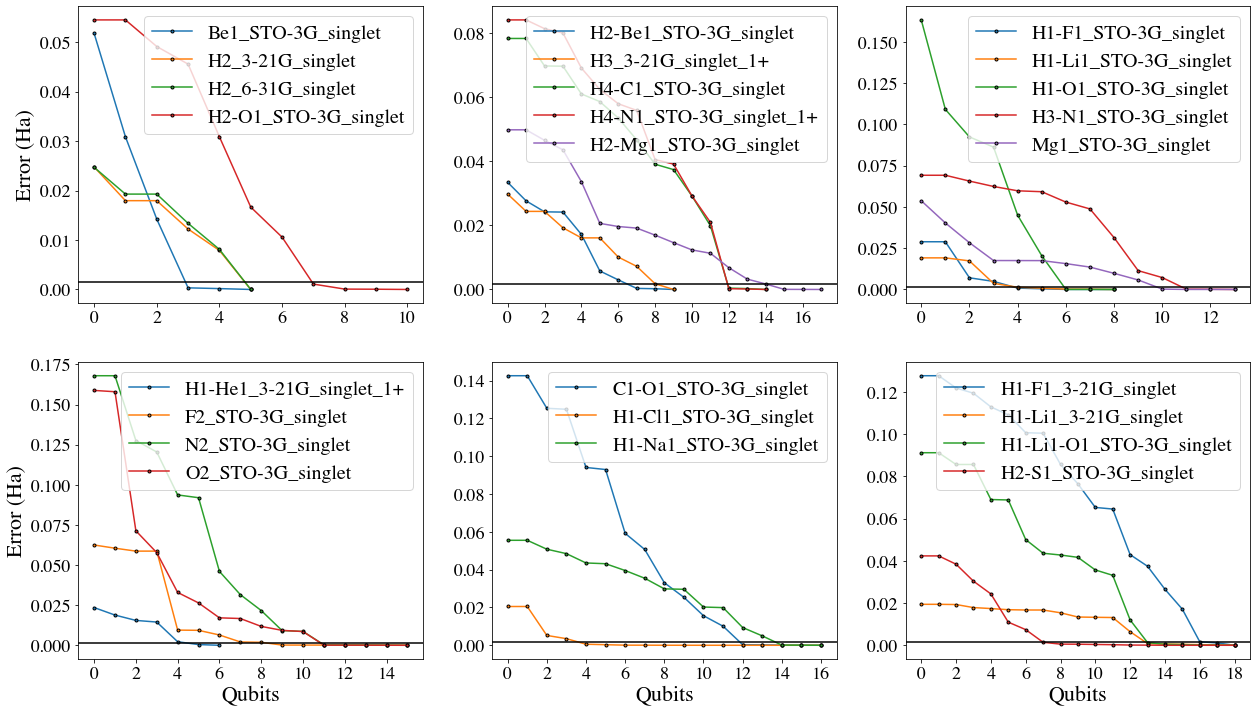

In [137]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (21,12))

for i in range(6):
    
    n_qubits = [[5,10],[9,14,17],[8,13],[6,15],[16],[18]][i]
    loca = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)][i]
    
    for filename in csvqe_results.keys():
        errors_heuristic = csvqe_results[filename][2]
        l = len(filename)
        if len(errors_heuristic)-1 in n_qubits:
            axs[loca[0],loca[1]].plot([i for i in range(len(errors_heuristic))],errors_heuristic,label=filename,marker='.',markeredgecolor='k')
    max_range = int(max(n_qubits))
    axs[loca[0],loca[1]].plot([x for x in np.arange(-max_range/20,21*max_range/20+1)],[0.0016 for x in np.arange(-max_range/20,21*max_range/20+1)],'-',c='k')
    axs[loca[0],loca[1]].set_xlim((-max_range/20,21*max_range/20))
    axs[loca[0],loca[1]].set_xticks([2*i for i in range(int((max_range+2)/2))])
    if loca[0] == 1:
        axs[loca[0],loca[1]].set_xlabel('Qubits',fontsize=22)
    if loca[1] == 0:
        axs[loca[0],loca[1]].set_ylabel('Error (Ha)',fontsize=22)
    axs[loca[0],loca[1]].tick_params(labelsize=18)
    axs[loca[0],loca[1]].legend(fontsize=20)
    
fig.show()